#### Steps of EDA

* **Problem Statement**

* **Univariate Analysis (Num & Cat)**: For Numerical Vars, we build **Distplot or Histograms** to check the shape of the Data. We can also build Boxplots for Numerical Data to check the presence of Outliers. However, for Categorical Data, We need to build Countplot (Frequency Plot).

* **Bivariate Analysis (Predictors vs Target)**: If my predictor is numerical column and the target is also numerical then we will build the **scatterplot**. However, if the predictor is categorical and the target is numerical, then we can build **Boxplot or Violinplot**. For Predictor and target to be categorical, we can build a cross tabulated data and plot the frequencies.

* **Missing Values**:

* **Outlier Identification & Removal**: Any value that is greater than Q3+1.5*IQR is considered to be an outlier on the upper side where as any value which is less than Q1 - 1.5*IQR is an inlier...

* **Feature Engineering**: Extracting the set of new features from the existing set of features. The purpose of Feature engineering is to ensure that we try to create new features such that the machine is able to learn the pattern efficiently and the model is able to generalise on the basis of new information provided.

* **Statistical Analysis** - This is where we will do the Hypothesis Testing of the New & Old Variables with the target. If the Statistical Test suggests that the Predictors have a relation with the target, we will include those features into the modelling.

* **Categorical Variable Analysis** - Here in this step, we convert the categories into dummies. One Hot Encoding, Frequency Encoding, Label Encoding (Ordinal Encoding) & Target Encoding.

* **Scaling and transformation**: Standard Scaler, Min Max Scaler, Robust Scaler
Note: When there are outliers in the data use a scaling technique called **ROBUST SCALER**

* Transformation: Log, Power, Reciprocal, Sqrt, Cuberoot, Yeo Johnson, Boxcox

### Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [1]:
# import the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import train and test file...

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
# Combine the dataset
combined = pd.concat([train, test], ignore_index = True)

In [4]:
combined.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [5]:
train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 12))

In [6]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

#### Univariate Analysis

In [7]:
combined.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

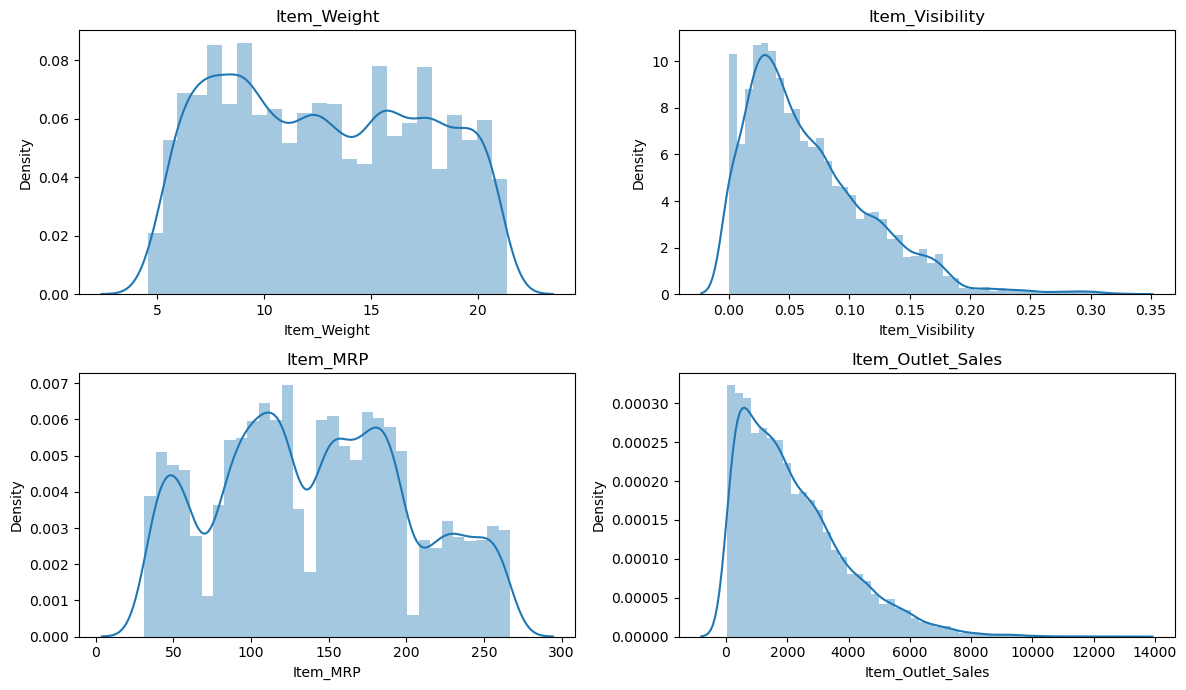

In [8]:

num_vars = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
            'Item_Outlet_Sales']

nrows = 2
ncols = 2
repeater = 1

plt.figure(figsize = (12, 7))
for i in num_vars:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(combined.loc[:, i])
    plt.title(i)
    repeater+=1
    
plt.tight_layout()
plt.show()

In [9]:
# Categorical Vars....

combined.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

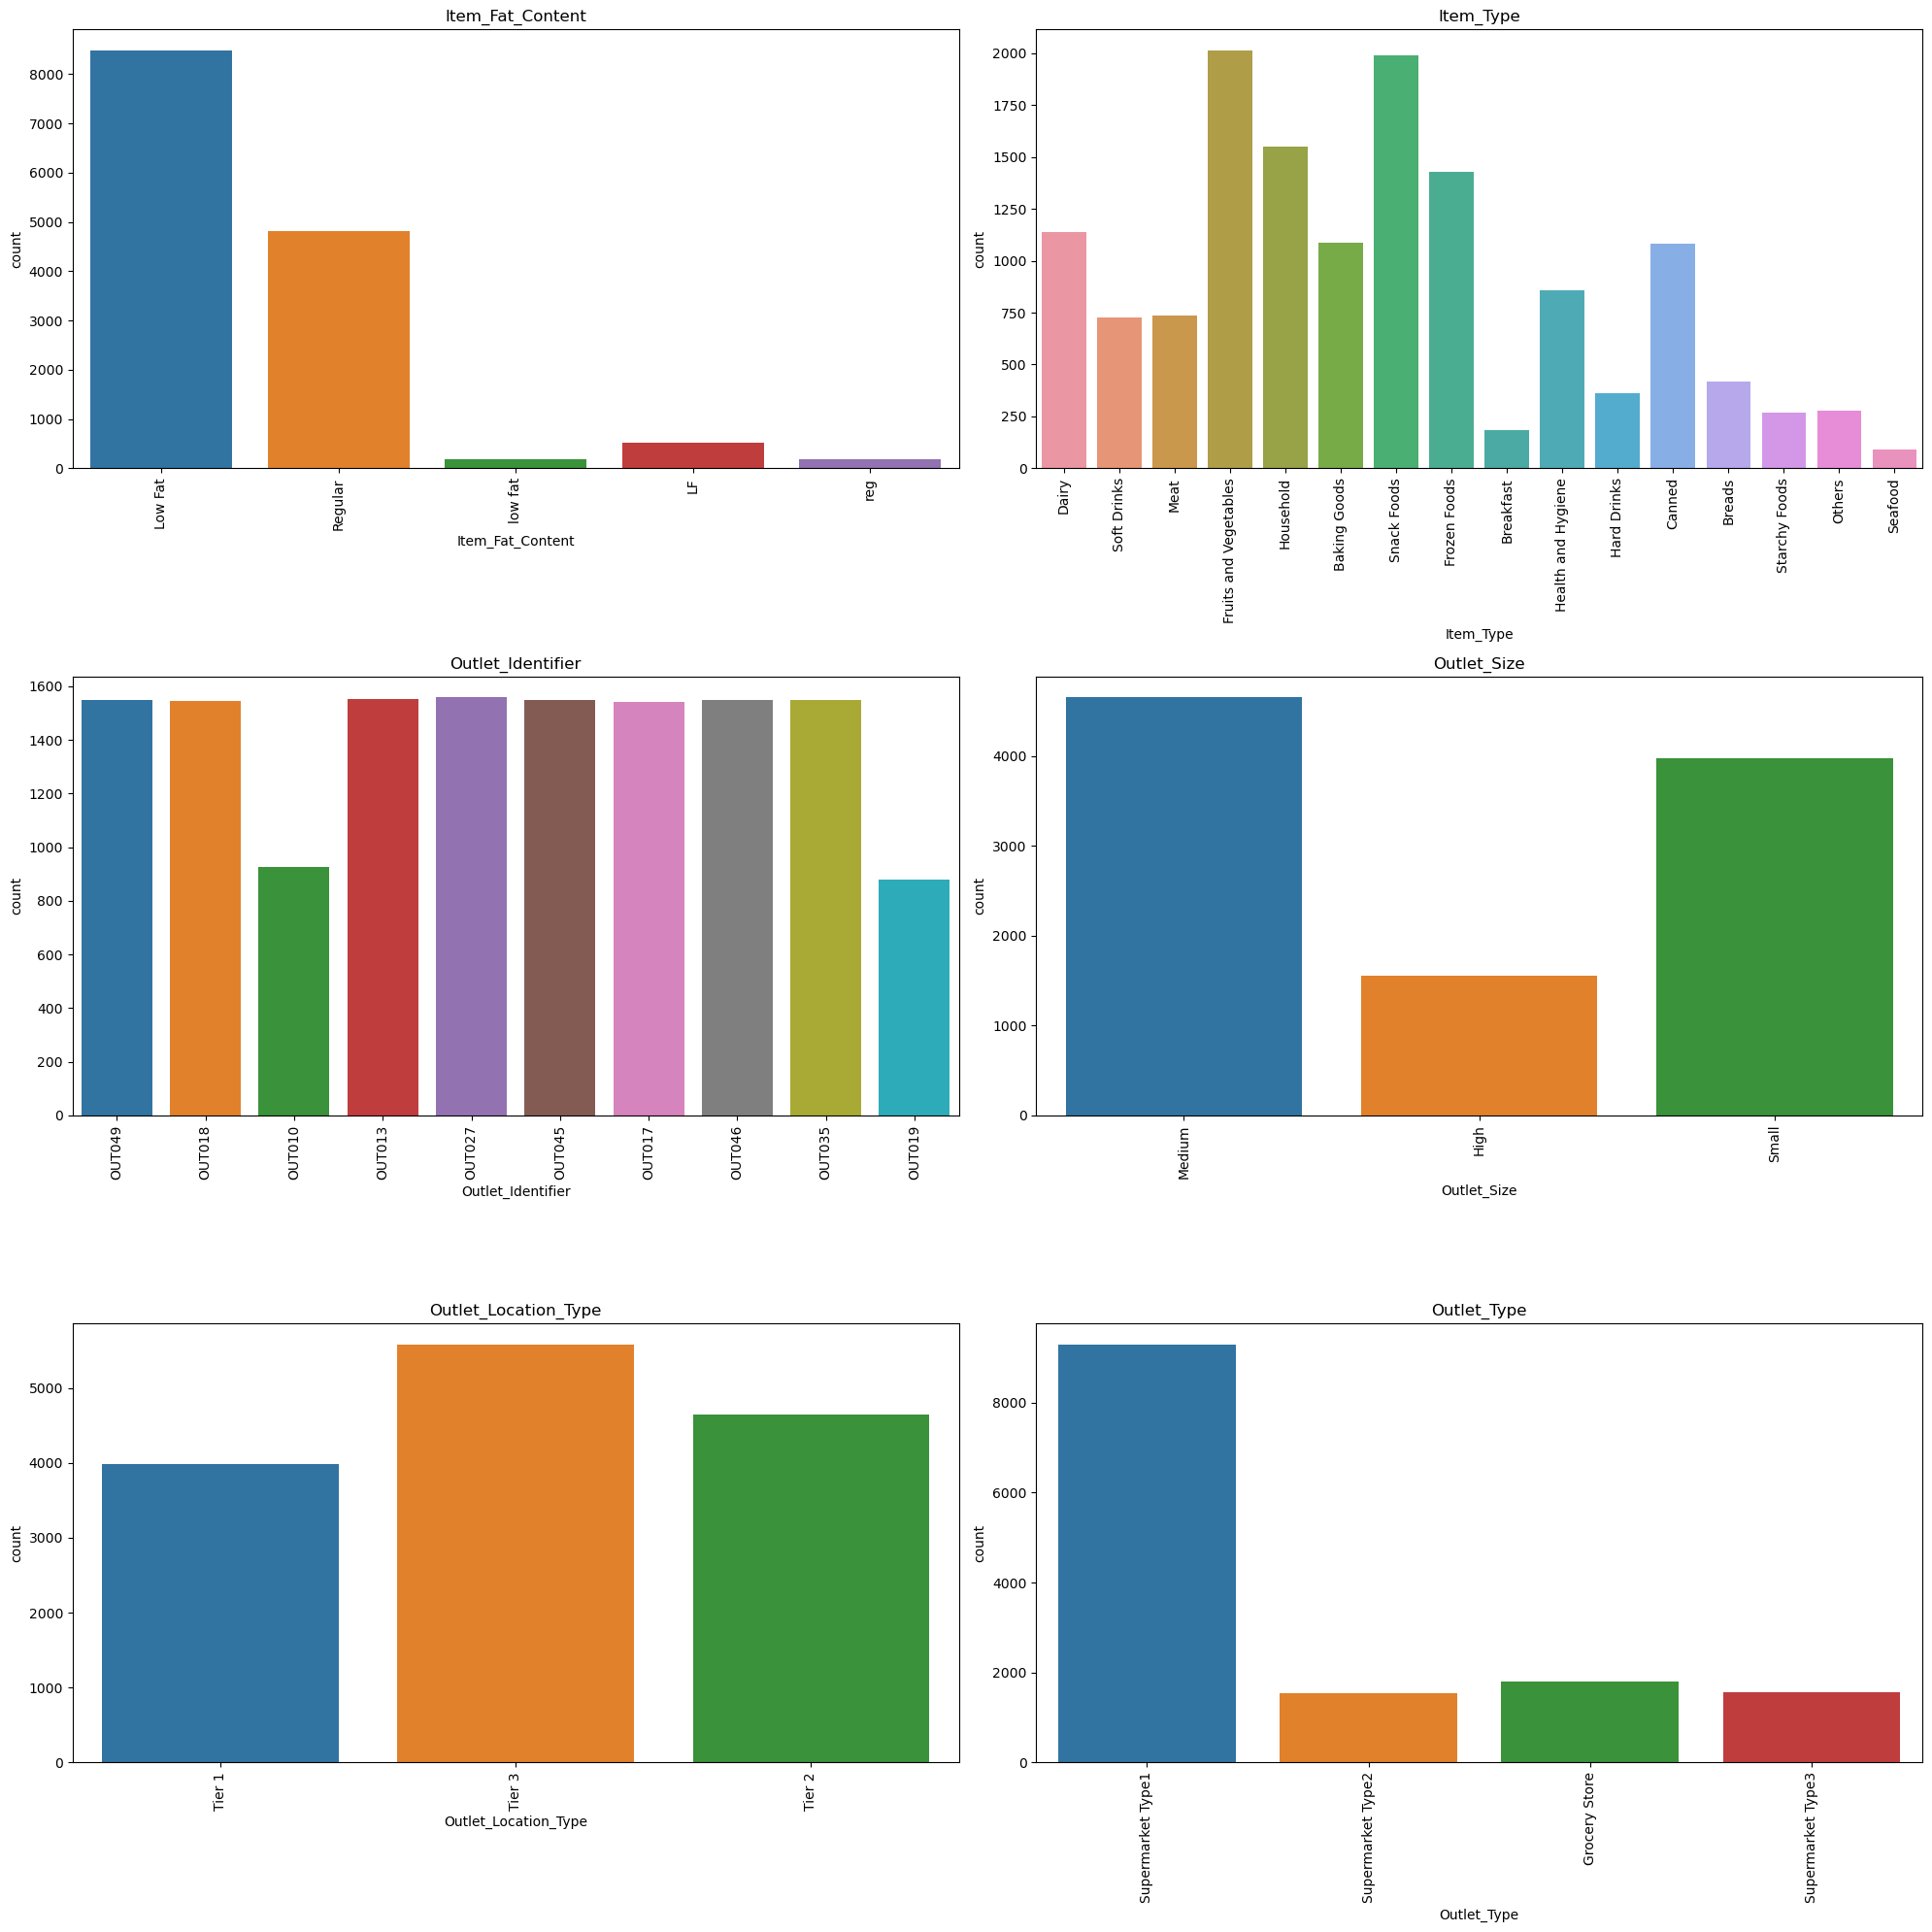

In [10]:
cats = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (20,20))
for i in cats:
    plt.subplot(nrows, ncols, repeater)
    sns.countplot(x = i, data  = combined)
    plt.title(i)
    repeater+=1
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

<Axes: >

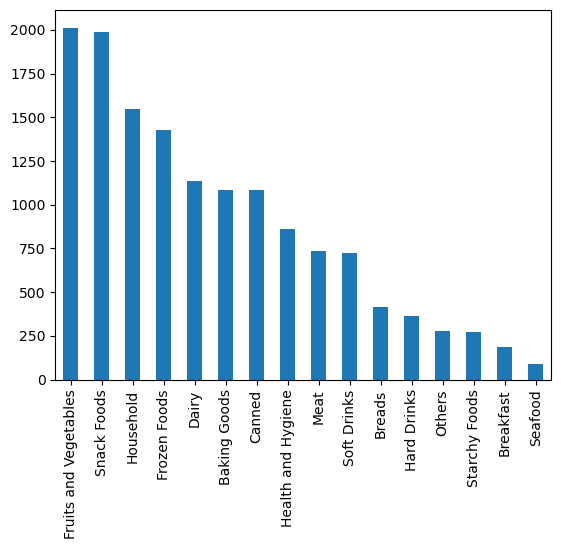

In [11]:
# Item Type
combined.Item_Type.value_counts().plot(kind = "bar")

In [12]:
# Outlet Identifier

combined.Outlet_Identifier.value_counts()[:3]

OUT027    1559
OUT013    1553
OUT049    1550
Name: Outlet_Identifier, dtype: int64

#### Inference:

* Most of the Products are Low Fat Content Products.
* Outlet Size is Medium Size, Type is S1 and they are mostly located in Tier 3 Cities.

* The Top 5 Selling Items are Fruits and Veggies, Dairy, Snacks followed Household & Frozen...

* The Most Popular Outlet is OUT027.

### Num vs Num

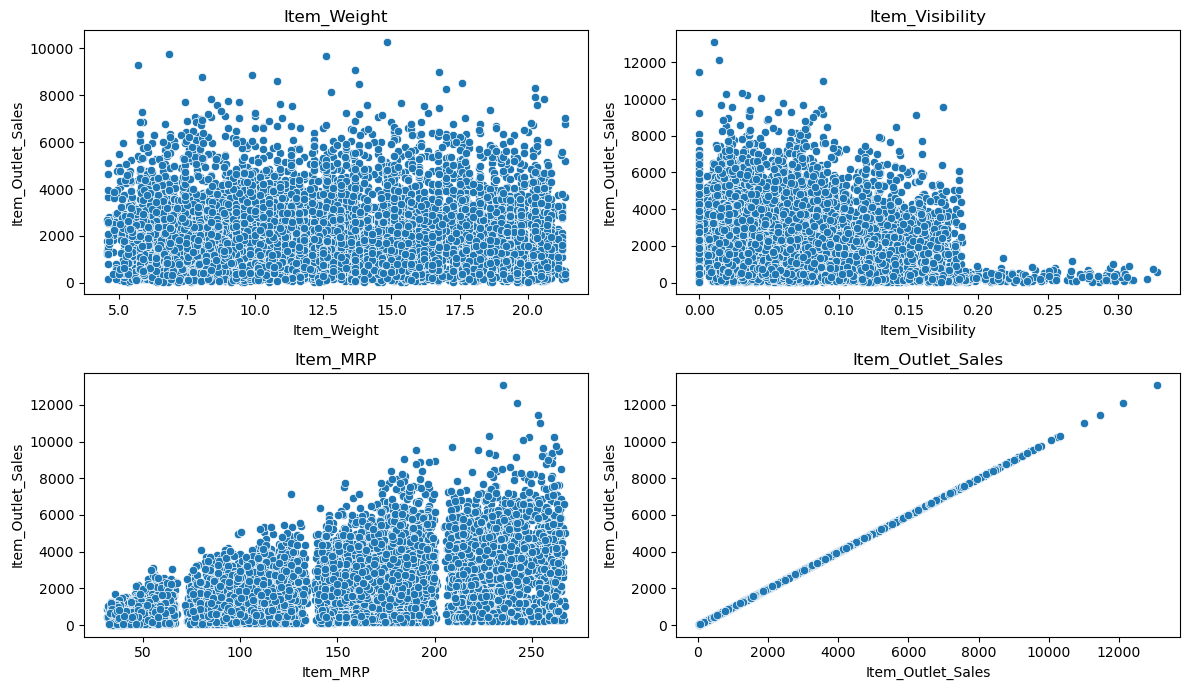

In [13]:
nrows = 2
ncols = 2
repeater = 1

plt.figure(figsize = (12, 7))
for i in num_vars:
    plt.subplot(nrows, ncols, repeater)
    sns.scatterplot(x = i, y = "Item_Outlet_Sales", 
                   data = combined)
    plt.title(i)
    repeater+=1
    
plt.tight_layout()
plt.show()

### Cat vs Num

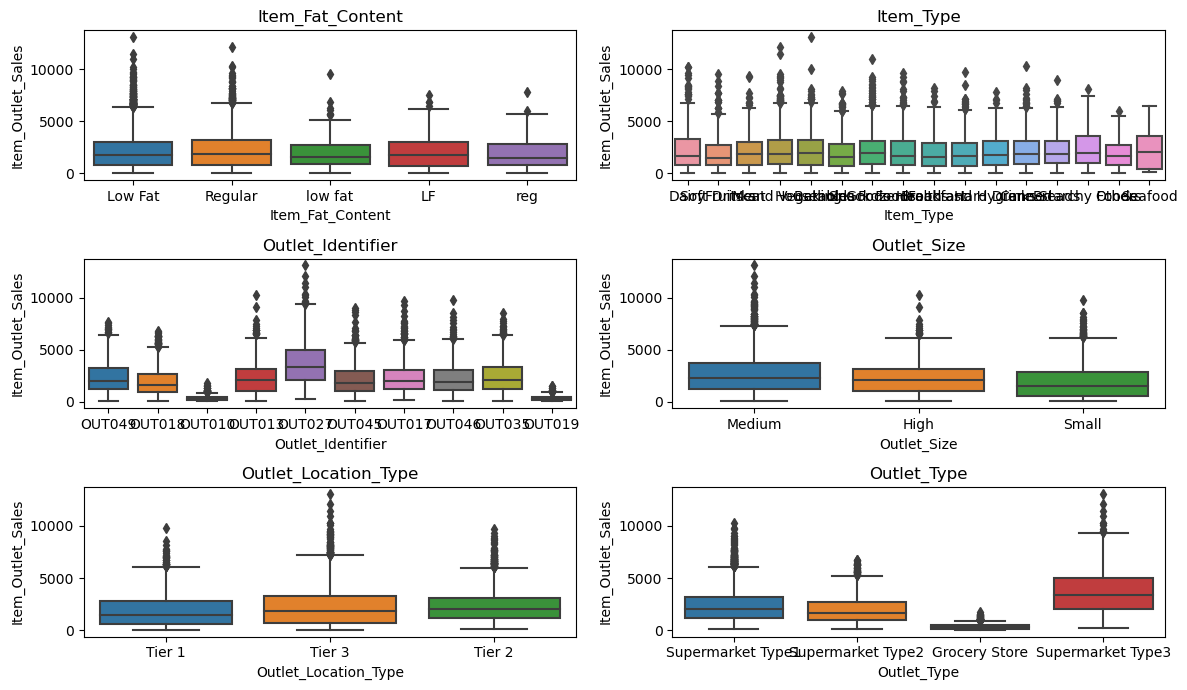

In [14]:
nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (12, 7))
for i in cats:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(x = i, y = "Item_Outlet_Sales", 
                   data = combined)
    plt.title(i)
    repeater+=1
    
plt.tight_layout()
plt.show()

In [15]:
# lets fix the Item Fat Content
#combined.Item_Fat_Content.unique()
combined.Item_Fat_Content.replace(to_replace =["low fat", "LF",
                                              "reg"],
                                 value = ["Low Fat",
                                         "Low Fat", "Regular"],
                                 inplace = True)



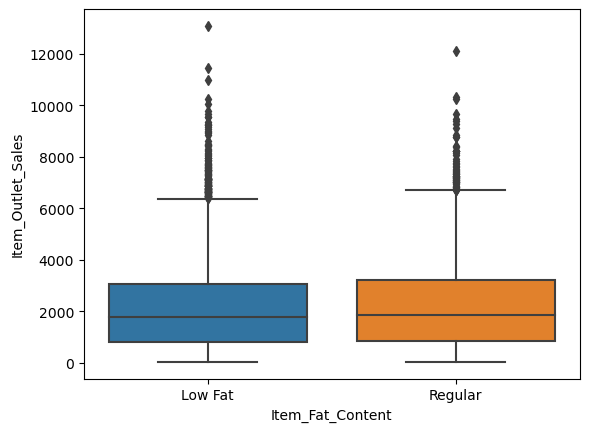

In [17]:
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales",
           data=combined);

### Missing Values

In [18]:
combined.isna().sum()[combined.isna().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [28]:
combined.groupby(['Item_Identifier'])\
["Item_Weight"].mean() 

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [29]:
#combined.loc[combined.Item_Identifier=="FDA15", "Item_Weight"]

combined["Item_Weight"]=combined.groupby("Item_Identifier")\
["Item_Weight"].apply(lambda x:x.fillna(x.median()))

In [30]:
combined["Item_Visibility"]=combined.groupby("Item_Identifier")\
["Item_Visibility"].apply(lambda x:x.replace(0, x.median()))

In [31]:
# Outlet Size....
# Outlet = id and it could be Type and location...

pd.DataFrame(combined.groupby(["Outlet_Identifier", 
                               "Outlet_Location_Type",
                 "Outlet_Type"])["Outlet_Size"].value_counts())

,,,,Outlet_Size
Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Outlet_Size,
OUT013,Tier 3,Supermarket Type1,High,1553
OUT018,Tier 3,Supermarket Type2,Medium,1546
OUT019,Tier 1,Grocery Store,Small,880
OUT027,Tier 3,Supermarket Type3,Medium,1559
OUT035,Tier 2,Supermarket Type1,Small,1550
OUT046,Tier 1,Supermarket Type1,Small,1550
OUT049,Tier 1,Supermarket Type1,Medium,1550


In [32]:
#combined.loc[combined.Outlet_Size.isnull(), 
       #      ["Outlet_Identifier", "Outlet_Location_Type", 
        #     "Outlet_Type"]].unique()

combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Type"].unique()

# Tier 3 has medium and high & Tier 2 Small

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [33]:
# S1 and Location Type 

# Check where the OT is S1 and Location is Tier 2...is there a miss

#combined.loc[(combined["Outlet_Location_Type"]=="Tier 2")& 
 #            (combined["Outlet_Type"]=="Supermarket Type1")&
  #          (combined.Outlet_Size).isnull()]

combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Size"]="Small"

In [34]:
combined.isna().sum()[combined.isna().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

#### Feature Engineering

In [35]:
combined.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [36]:
itemskilist=[]

for i in combined.Item_Identifier:
    itemskilist.append(i[:2])

In [37]:
combined["Item_Cats"] = pd.Series(itemskilist)

<Axes: xlabel='Item_Cats', ylabel='Item_Outlet_Sales'>

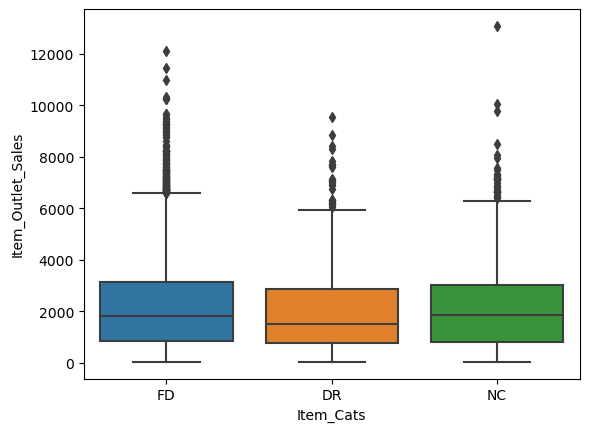

In [38]:
# Visualization...
sns.boxplot(x = "Item_Cats", y  ="Item_Outlet_Sales", 
            data = combined)

In [39]:
# Ho: Item Cat has no relation with the Sales
# Ha: Ho is False

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols("Item_Outlet_Sales~Item_Cats", 
                data = combined).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Cats,2.0,3.652405e+07,1.826203e+07,6.278766,0.001884
Residual,8520.0,2.478074e+10,2.908538e+06,NaN,NaN


In [40]:
combined.loc[combined.Item_Cats=="NC", 
             "Item_Fat_Content"]="Non Edible"

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

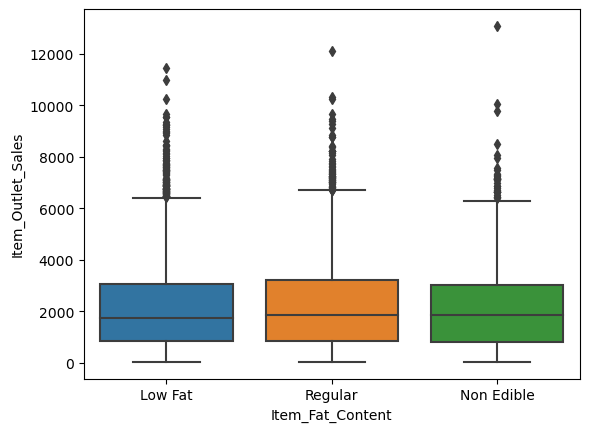

In [41]:
sns.boxplot(x = "Item_Fat_Content", y  ="Item_Outlet_Sales", 
            data = combined)

In [42]:
model = sfa.ols("Item_Outlet_Sales~Item_Fat_Content", 
                data = combined).fit()

anova_lm(model) # Conc: Item Fat Content has no relation with sales

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,2.0,9.201502e+06,4.600751e+06,1.580067,0.206022
Residual,8520.0,2.480806e+10,2.911745e+06,NaN,NaN


In [43]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [44]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

In [45]:
def badaldo(x):
    if x in perishables:
        return("Perish")
    else:
        return("Non_Perish")

In [46]:
combined["Item_Converted"] = combined.Item_Type.apply(badaldo)

In [47]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats,Item_Converted
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perish
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perish


In [48]:
# Vintage
combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [49]:
# Drop the Vars

combined.drop(["Item_Identifier", "Item_Fat_Content", 
              "Outlet_Establishment_Year"], axis = 1, 
              inplace = True)

In [50]:
combined.isna().sum()[combined.isna().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

#### Split the Data in Train and Test Again...

In [51]:
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [52]:
newtrain.shape, newtest.shape, train.shape, test.shape

((8523, 12), (5681, 12), (8523, 12), (5681, 11))

In [53]:
newtest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

In [54]:
newtest.shape

(5681, 11)

In [55]:
newtrain.head(2)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats,Item_Converted,Vintage
0,9.30,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perish,14
1,5.92,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perish,4


In [56]:
from scipy import stats

In [57]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Vintage']

for i in cols:
    teststats, pvalue = stats.ttest_ind(newtrain.loc[:, i],
                                       newtrain.Item_Outlet_Sales)
    print("Pvalue for", i, pvalue)

Pvalue for Item_Weight 0.0
Pvalue for Item_Visibility 0.0
Pvalue for Item_MRP 0.0
Pvalue for Vintage 0.0


In [58]:
perish = newtrain.loc[newtrain.Item_Converted=="Perish",
                     "Item_Outlet_Sales"]

nonperish = newtrain.loc[newtrain.Item_Converted=="Non_Perish",
                     "Item_Outlet_Sales"]

teststats, pvalue = stats.ttest_ind(perish, nonperish)
pvalue

0.009371173426112867

In [59]:
model = sfa.ols("Item_Outlet_Sales~Outlet_Type", 
                data = combined).fit()

anova_lm(model) 

,df,sum_sq,mean_sq,F,PR(>F)
Outlet_Type,3.0,5.945604e+09,1.981868e+09,894.650012,0.0
Residual,8519.0,1.887166e+10,2.215244e+06,NaN,NaN


In [60]:
mapped = newtrain.groupby("Item_Type")\
["Item_Outlet_Sales"].mean().to_dict()
mapped

{'Baking Goods': 1952.9712070987655,
 'Breads': 2204.1322262948206,
 'Breakfast': 2111.808650909091,
 'Canned': 2225.19490385208,
 'Dairy': 2232.5425970674487,
 'Frozen Foods': 2132.867743691589,
 'Fruits and Vegetables': 2289.0095915584416,
 'Hard Drinks': 2139.2216224299063,
 'Health and Hygiene': 2010.0002650000001,
 'Household': 2258.78430021978,
 'Meat': 2158.9779105882353,
 'Others': 1926.139701775148,
 'Seafood': 2326.065928125,
 'Snack Foods': 2277.3217391666667,
 'Soft Drinks': 2006.5117348314607,
 'Starchy Foods': 2374.332772972973}

In [61]:
newtrain["Item_Type"] = newtrain.Item_Type.map(mapped)

In [62]:
newtest["Item_Type"] = newtest.Item_Type.map(mapped)

In [63]:
newtrain.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats,Item_Converted,Vintage
0,9.30,0.016047,2232.542597,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perish,14
1,5.92,0.019278,2006.511735,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perish,4
2,17.50,0.016760,2158.977911,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perish,14
3,19.20,0.022914,2289.009592,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,FD,Perish,15
4,8.93,0.013177,2258.784300,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perish,26


<Axes: >

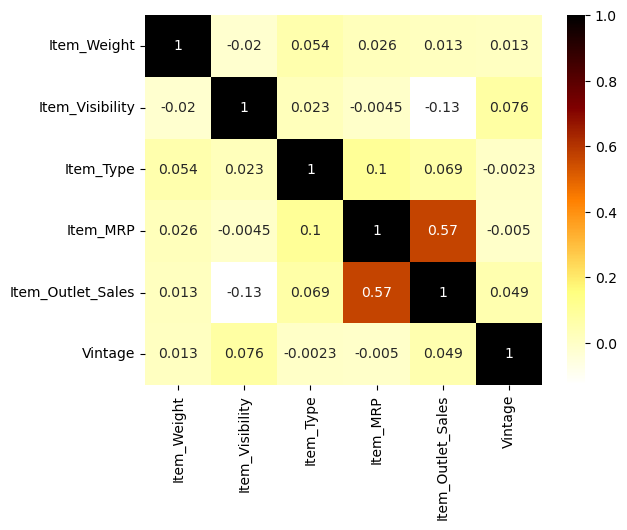

In [64]:
sns.heatmap(newtrain.corr(), annot=True, cmap = "afmhot_r")

In [65]:
newtrain

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats,Item_Converted,Vintage
0,9.300,0.016047,2232.542597,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perish,14
1,5.920,0.019278,2006.511735,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perish,4
2,17.500,0.016760,2158.977911,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perish,14
3,19.200,0.022914,2289.009592,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,FD,Perish,15
4,8.930,0.013177,2258.784300,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perish,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,2277.321739,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,FD,Non_Perish,26
8519,8.380,0.046982,1952.971207,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,FD,Non_Perish,11
8520,10.600,0.035186,2010.000265,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,NC,Non_Perish,9
8521,7.210,0.145221,2277.321739,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Non_Perish,4


In [66]:
newtrain = pd.get_dummies(newtrain, drop_first = True)

In [67]:
newtest = pd.get_dummies(newtest , drop_first= True)

In [68]:
x = newtrain.drop(columns='Item_Outlet_Sales')
y = newtrain['Item_Outlet_Sales']

In [69]:
from sklearn.model_selection import train_test_split

trainx , testx , trainy , testy = train_test_split(x,y,train_size=0.80,random_state=10)
print(trainx.shape,trainy.shape,testx.shape,testy.shape)

(6818, 24) (6818,) (1705, 24) (1705,)


In [70]:
def model_validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    pred = m.predict(testx)
    print('MSE',mean_squared_error(testy,pred))
    print('RMSE',np.sqrt(mean_squared_error(testy,pred)))
    print('MAE',mean_absolute_error(testy,pred))
    print('MAPE',mean_absolute_percentage_error(testy,pred))
    r2 = r2_score(testy,pred)
    print('R Squared:',r2)

In [71]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,StackingRegressor

In [72]:
model_validation(model=DecisionTreeRegressor(max_depth=5),trainx=trainx,trainy=trainy,
                testx=testx,testy=testy)

MSE 1185573.4122811744
RMSE 1088.8403979836414
MAE 759.6317351986382
MAPE 0.5677429194862555
R Squared: 0.600603456414319


In [73]:
model_validation(model=RandomForestRegressor(n_estimators=1500,max_depth=5,n_jobs=-1,oob_score=True,min_impurity_decrease=12),trainx=trainx,trainy=trainy,
                testx=testx,testy=testy)

MSE 1153291.1877192904
RMSE 1073.913957316549
MAE 750.7296496086277
MAPE 0.5839130991873008
R Squared: 0.6114787078122607


In [76]:
def base_models():
    models = dict()
    models['LR'] = LinearRegression()
    models['DTREE'] = DecisionTreeRegressor(max_depth=5)
    models['RF'] = RandomForestRegressor(n_estimators=1500,max_depth=5,n_jobs=-1,oob_score=True,min_impurity_decrease=12)
    models['GBM'] = GradientBoostingRegressor()
    models['XGB'] = XGBRegressor(n_estimators=600,learning_rate=0.008,random_state=20)
    return models

In [77]:
from sklearn.model_selection import KFold,cross_val_score
def eval_models(model):
    cv = KFold(n_splits=5,shuffle=True,random_state=1001)
    scores = np.sqrt(-cross_val_score(estimator=model, X =x,y = y,cv=cv,scoring='neg_mean_squared_error',
                            n_jobs=-1))
    return scores




In [78]:
# lets use the functions to calculate the scores........

models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean(result))

LR 1128.5072488345163
DTREE 1114.2948995847717
RF 1103.153490105324
GBM 1098.6174034735272
XGB 1097.9045916183784


In [82]:
from sklearn.ensemble import StackingRegressor

GBM = GradientBoostingRegressor()
XGB = XGBRegressor()
rf = RandomForestRegressor(n_estimators=1500,max_depth=5,n_jobs=-1,oob_score=True,min_impurity_decrease=12)
base_estimators = [('GBM',GBM),('XGB',XGB)]
stack = StackingRegressor(estimators = base_estimators,final_estimator=rf,cv=5)

pred = stack.fit(x,y).predict(newtest)

In [83]:
submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = pred

In [84]:
submission.to_csv('stacking1.csv',index=False)

In [85]:
from sklearn.ensemble import StackingRegressor

base_estimators = [('rf',RandomForestRegressor(n_estimators=1500,max_depth=5,n_jobs=-1)),
                  ('xgb',XGBRegressor(max_depth=3,learning_rate=0.08,estimator=100))]

stack = StackingRegressor(estimators = base_estimators,final_estimator=DecisionTreeRegressor(max_depth=5),cv=5)

pred = stack.fit(x,y).predict(newtest)

In [86]:
submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = pred

In [87]:
submission.to_csv('stacking2.csv',index=False)

In [135]:
from xgboost import XGBRegressor

model_validation(model=AdaBoostRegressor(n_estimators=600,learning_rate=0.008,random_state=20),trainx=trainx,trainy=trainy,
                testx=testx,testy=testy)

MSE 1442215.479909592
RMSE 1200.9227618417399
MAE 906.9573150945054
MAPE 1.3190111603657337
R Squared: 0.5141457527515425


In [140]:
base_estimators = [('rf',RandomForestRegressor(n_estimators=1500,max_depth=5,n_jobs=-1)),
                  ('xgb',XGBRegressor(max_depth=3,learning_rate=0.08,estimator=100))]
model_validation(model=StackingRegressor(final_estimator = DecisionTreeRegressor(max_depth=5),estimators=base_estimators,n_jobs=-1),trainx=trainx,trainy=trainy,
                testx=testx,testy=testy)

MSE 1198660.9803778473
RMSE 1094.8337683766642
MAE 761.8343928902973
MAPE 0.5709198789073067
R Squared: 0.5961945101545545


In [92]:
xgb = XGBRegressor(n_estimators=600,learning_rate=0.008,random_state=20)
xgb.fit(x,y)
pred = xgb.predict(newtest)
submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = pred

In [93]:
submission.to_csv('xg1.csv',index=False)

model_validation(model=AdaBoostRegressor(n_estimators=150
                                        ),trainx=trainx,trainy=train_y,
                testx=testx,testy=test_y)

In [173]:
from xgboost import XGBRegressor
model_validation(model=XGBRegressor(max_depth=2,learning_rate = 0.08,n_estimator=1000),trainx=trainx,trainy=train_y,
                testx=testx,testy=test_y)

MSE 1176817.9039059086
RMSE 1084.8123818918682
MAE 779.9616697962213
MAPE 0.7611160345258965
R Squared: 0.6035530163033926
